In [1]:
# !wget https://github.com/alexeygrigorev/large-datasets/releases/download/dogs-cats/train.zip

<PIL.Image.Image image mode=RGB size=150x150 at 0x7FB7B85298E0>


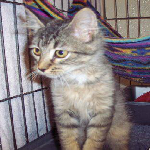

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import load_img
path_train = './data/train'
path_val = './data/validation'

img = load_img(path_train+"/cats/cat.2.jpg", target_size=(150, 150))
print(img)
display(img)
# imgArray = np.array(img)


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input


# train_gen = ImageDataGenerator(preprocessing_function=preprocess_input,
# #                                rotation_range=30,
# #                                width_shift_range=10.0,
# #                                height_shift_range=10.0,
# #                                shear_range=10,
# #                                zoom_range=0.1,
# #                                vertical_flip=True,
#                               )

# train_ds = train_gen.flow_from_directory(path_train, 
#                                          target_size=(150,150), 
#                                          batch_size=32)
# print("Infered class_indices from folders:", train_ds.class_indices)
# print()


# val_gen = ImageDataGenerator(preprocessing_function=preprocess_input) #no augmentation, we want realistic results

# val_ds = val_gen.flow_from_directory(path_val, 
#                                      target_size=(150,150), 
#                                      batch_size=32,
#                                      shuffle=True)

# base_model = Xception(weights='imagenet', 
#                       include_top=False, #don't include the dense layers
#                       input_shape=(150,150,3))

# base_model.trainable = False #freeze convolutional layers

# # create a covolutional layer
# inputs = keras.Input(shape=(150,150,3))
# base = base_model(inputs, training=False)
layer_conv2D=tf.keras.layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        input_shape=(150,150,3) ,
#         strides=(1, 1),
#         padding="valid",
#         data_format=None,
#         dilation_rate=(1, 1),
#         groups=1,
        activation='relu',
#         use_bias=True,
#         kernel_initializer="glorot_uniform",
#         bias_initializer="zeros",
#         kernel_regularizer=None,
#         bias_regularizer=None,
#         activity_regularizer=None,
#         kernel_constraint=None,
#         bias_constraint=None
    )
# print("Conv2D shape=",layer_conv2D(inputs).shape)

layer_max_pool_2d = tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
#     strides=None, 
#     padding="valid", 
#     data_format=None, 
#     **kwargs
)
# print("max_pool_2d shape=",layer_max_pool_2d(layer_conv2D(inputs)).shape)

layer_flatten = tf.keras.layers.Flatten(
#         data_format=None,
#         **kwargs
    )

def prepare_model():
    model = tf.keras.Sequential()
    model.add(layer_conv2D)
    model.add(layer_max_pool_2d)
    model.add(layer_flatten)
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
#     model.add(keras.layers.Dense(1))  #ASK!
    print("Model shape: ",model.output_shape)

    # Optimizer
    

    # loss = keras.losses.BinaryCrossentropy(from_logits=False)

    # model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    # history = model.fit(train_ds, epochs=1, validation_data=val_ds)
    # history.history
    return model



In [7]:
# Q1

optimizer = tf.keras.optimizers.SGD(lr=0.002, momentum=0.8)

losses = {
    'MeanSquaredError': keras.losses.MeanSquaredError(),
    'CategoricalCrossentropy': keras.losses.CategoricalCrossentropy(),
    'BinaryCrossentropy': keras.losses.BinaryCrossentropy(from_logits=False),    
}

scores = {}

for k,loss in losses.items():
    print("Processing loss:", k)
    model = prepare_model()
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    history = model.fit(train_ds, epochs=1, validation_data=val_ds)
    scores[k] = history.history

scores


Processing loss: MeanSquaredError
Model shape:  (None, 1)
625/625 [==============================] - 191s 305ms/step - loss: 0.2502 - accuracy: 0.5000 - val_loss: 0.2500 - val_accuracy: 0.5000
Processing loss: BinaryCrossentropy
Model shape:  (None, 1)
625/625 [==============================] - 184s 294ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


{'MeanSquaredError': {'loss': [0.25015008449554443],
  'accuracy': [0.5],
  'val_loss': [0.2500450015068054],
  'val_accuracy': [0.5]},
 'BinaryCrossentropy': {'loss': [0.6933426260948181],
  'accuracy': [0.5],
  'val_loss': [0.693176805973053],
  'val_accuracy': [0.5]}}

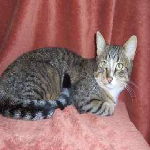

(1, 150, 150, 3)
Model shape:  (None, 1)


array([[0.47804853]], dtype=float32)

In [53]:
path_cat = 'data/validation/cats/cat.10004.jpg'
path_dog = 'data/validation/dogs/dog.10008.jpg'

img = load_img(path_cat, target_size=(150,150))
display(img)

x = np.array(img)
X = np.array([x])
print(X.shape)

X = preprocess_input(X)
model = prepare_model()
model.predict(X)


In [19]:
# Q2

def build_model(model):
    optimizer = tf.keras.optimizers.SGD(lr=0.002, momentum=0.8)
    loss = keras.losses.BinaryCrossentropy(from_logits=False),    
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    return model

model = build_model(prepare_model())

# history = model.fit(train_ds, epochs=1, validation_data=val_ds)
model.summary()

Model shape:  (None, 1)
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 175232)            0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                11214912  
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 65        
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Q3

train_gen1 = ImageDataGenerator(rescale=1./255)
train_ds1 = train_gen1.flow_from_directory(path_train, 
                                         target_size=(150,150), 
                                         class_mode='binary',
                                         batch_size=20)
print("Infered class_indices from folders:", train_ds1.class_indices)
print()


val_gen1 = ImageDataGenerator(rescale=1./255)
val_ds1 = val_gen1.flow_from_directory(path_val, 
                                     target_size=(150,150), 
                                     class_mode='binary',
                                     batch_size=20,
                                     shuffle=True #ASK!
                                      )

history1 = model.fit(
    train_ds1,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_ds1,
    validation_steps=50
)
history1.history

Found 20000 images belonging to 2 classes.
Infered class_indices from folders: {'cats': 0, 'dogs': 1}

Found 5000 images belonging to 2 classes.
Epoch 1/10
100/100 [==============================] - 17s 169ms/step - loss: 0.7081 - accuracy: 0.5025 - val_loss: 0.6915 - val_accuracy: 0.5080
Epoch 2/10
100/100 [==============================] - 17s 168ms/step - loss: 0.6923 - accuracy: 0.5115 - val_loss: 0.6904 - val_accuracy: 0.5600
Epoch 3/10
100/100 [==============================] - 18s 175ms/step - loss: 0.6889 - accuracy: 0.5455 - val_loss: 0.6866 - val_accuracy: 0.5480
Epoch 4/10
100/100 [==============================] - 18s 179ms/step - loss: 0.6859 - accuracy: 0.5545 - val_loss: 0.6801 - val_accuracy: 0.5660
Epoch 5/10
100/100 [==============================] - 18s 180ms/step - loss: 0.6786 - accuracy: 0.5500 - val_loss: 0.6744 - val_accuracy: 0.5760
Epoch 6/10
100/100 [==============================] - 18s 182ms/step - loss: 0.6768 - accuracy: 0.5615 - val_loss: 0.6587 - val_ac

{'loss': [0.708066999912262,
  0.6923074722290039,
  0.6888917684555054,
  0.6858830451965332,
  0.6785840392112732,
  0.6767815351486206,
  0.6650513410568237,
  0.6596421003341675,
  0.6542428731918335,
  0.6470667719841003],
 'accuracy': [0.5024999976158142,
  0.5115000009536743,
  0.5454999804496765,
  0.5544999837875366,
  0.550000011920929,
  0.5615000128746033,
  0.5945000052452087,
  0.6085000038146973,
  0.6159999966621399,
  0.6134999990463257],
 'val_loss': [0.6914753913879395,
  0.6904213428497314,
  0.6866353750228882,
  0.6800552606582642,
  0.6744110584259033,
  0.6586923599243164,
  0.703696608543396,
  0.646368145942688,
  0.6718835830688477,
  0.6342860460281372],
 'val_accuracy': [0.5080000162124634,
  0.5600000023841858,
  0.5479999780654907,
  0.5659999847412109,
  0.5759999752044678,
  0.6209999918937683,
  0.5270000100135803,
  0.6200000047683716,
  0.5950000286102295,
  0.6269999742507935]}

In [21]:
# Q3
print('median of training accuracy:', np.median(history1.history['accuracy']))
# Q4
print('standard deviation of training loss:', np.std(history1.history['loss']))

median of training accuracy: 0.55799999833107
standard deviation of training loss: 0.018061373870687347


In [ ]:
train_gen2 = ImageDataGenerator(preprocessing_function=preprocess_input,
                               rotation_range=40,
                               width_shift_range=0.2,
                               height_shift_range=0.2,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True,
                               fill_mode='nearest'
                              )

train_ds2 = train_gen2.flow_from_directory(path_train, 
                                         target_size=(150,150), 
                                         class_mode='binary',
                                         batch_size=20)
print("Infered class_indices from folders:", train_ds2.class_indices)
print()


val_gen2 = ImageDataGenerator(rescale=1./255)
val_ds2 = val_gen2.flow_from_directory(path_val, 
                                     target_size=(150,150), 
                                     class_mode='binary',
                                     batch_size=20,
                                     shuffle=True #ASK!
                                      )


history2 = model.fit(
    train_ds2,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_ds2,
    validation_steps=50
)
history2.history

Found 20000 images belonging to 2 classes.
Infered class_indices from folders: {'cats': 0, 'dogs': 1}

Found 5000 images belonging to 2 classes.
Epoch 1/10
100/100 [==============================] - 24s 239ms/step - loss: 0.6695 - accuracy: 0.5865 - val_loss: 0.6378 - val_accuracy: 0.6420
Epoch 2/10
100/100 [==============================] - 24s 240ms/step - loss: 0.6508 - accuracy: 0.6245 - val_loss: 0.6430 - val_accuracy: 0.6170
Epoch 3/10
100/100 [==============================] - 25s 248ms/step - loss: 0.6498 - accuracy: 0.6080 - val_loss: 0.7156 - val_accuracy: 0.5400
Epoch 4/10
100/100 [==============================] - 25s 252ms/step - loss: 0.6398 - accuracy: 0.6285 - val_loss: 0.6431 - val_accuracy: 0.6280
Epoch 5/10
100/100 [==============================] - 25s 252ms/step - loss: 0.6457 - accuracy: 0.6235 - val_loss: 0.6622 - val_accuracy: 0.5860
Epoch 6/10
100/100 [==============================] - 26s 255ms/step - loss: 0.6447 - accuracy: 0.6120 - val_loss: 0.6391 - val_ac

In [59]:
# Q5
print('mean of validation loss:', np.mean(history2.history['val_loss']))
# Q4
val_accuracy_last5 = history2.history['val_accuracy'][-5:]
print('average of last 5 values for validation accuracy:', np.mean(val_accuracy_last5))
print('average of last 5 values for validation accuracy:', np.sum(val_accuracy_last5)/len(val_accuracy_last5))

mean of validation loss: 0.643899554014206
average of last 5 values for validation accuracy: 0.6314000010490417
average of last 5 values for validation accuracy: 0.6314000010490417


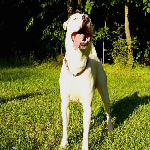

(1, 150, 150, 3)
Model shape:  (None, 1)


array([[-0.5204817]], dtype=float32)

In [15]:
path_cat = 'data/validation/cats/cat.10004.jpg'
path_dog = 'data/validation/dogs/dog.10008.jpg'

img = load_img(path_dog, target_size=(150,150))
display(img)

x = np.array(img)
X = np.array([x])
print(X.shape)

X = preprocess_input(X)
model = prepare_model()
model.predict(X)
